# AB Testing EDA

This dataset comes from https://www.kaggle.com/datasets/farhadzeynalli/online-advertising-effectiveness-study-ab-testing

by Farhad Zeynalli

**Information provided by Source**
A large company with a substantial user base plans to increase sales through advertisement on its website. However, they are still undecided about whether the ads increase sales or not. In order to determine whether this is the case, 20000 customers were subjected to A/B testing for 31 days.

**Columns** 
CustomerID: Unique identifier 
Test Group: composed of 60% Ad and 40% PSA
Made_purchase: boolean regarding made purchase/conversion
Days_with_most_add: Day of the month when the user saw the most ads
Peak ad hours: hour of the day when the user saw the most ads
Ad_count: total number of ads seen by each user


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
ab_df = pd.read_csv('online_ad_AB.csv')
ab_df.head()

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


Just to see the size, what kinds of values we have for each of these, and whether we have any duplicates.

In [9]:
length = len(ab_df)
print(f'The length of the dataframe is {length}')

The length of the dataframe is 20000


In [10]:
ab_df.duplicated().value_counts()
print(f'If there are any True values, there would be duplicates present. Since there are no True values, and all {length} are False, there are no duplicates in this dataset.')

If there are any True values, there would be duplicates present. Since there are no True values, and all 20000 are False, there are no duplicates in this dataset.


In [8]:
ab_df['test group'].value_counts()

ad     12053
psa     7947
Name: test group, dtype: int64

In [11]:
ab_df.isnull().sum()

customerID            0
test group            0
made_purchase         0
days_with_most_add    0
peak ad hours         0
ad_count              0
dtype: int64

The original description was that there was a 60:40 split in the data, which would be exactly 12000 and 8000. This is close, but not exactly. If we don't use all of the data and just take a random sample of defined size, we won't have to worry as much about this, but this will have to be considered when initially doing the Power Analysis. 

(array([12053.,  7947.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

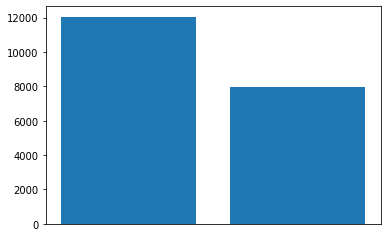

In [30]:
plt.hist(ab_df['test group'], bins=2, rwidth=0.8)

In [9]:
ab_df['made_purchase'].value_counts()

False    18940
True      1060
Name: made_purchase, dtype: int64

In [10]:
ab_df['days_with_most_add'].value_counts()


22    709
25    693
13    690
21    688
19    682
23    682
6     681
28    680
24    678
5     677
2     677
11    677
27    676
3     674
17    671
4     670
18    665
9     665
30    663
10    662
16    659
7     659
12    655
26    650
14    650
29    648
8     642
1     636
20    627
15    614
Name: days_with_most_add, dtype: int64

(array([636., 677., 674., 670., 677., 681., 659., 642., 665., 662., 677.,
        655., 690., 650., 614., 659., 671., 665., 682., 627., 688., 709.,
        682., 678., 693., 650., 676., 680., 648., 663.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <BarContainer object of 30 artists>)

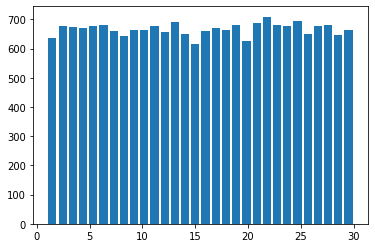

In [28]:
plt.hist(ab_df['days_with_most_add'], bins = 30, rwidth=0.8)


In [11]:
ab_df['peak ad hours'].value_counts()


18    1749
23    1724
16    1690
22    1654
20    1653
19    1649
21    1641
15    1635
17    1605
9      390
0      380
4      379
11     368
2      366
8      358
10     354
7      352
1      351
13     344
12     343
3      342
6      341
5      332
Name: peak ad hours, dtype: int64

(array([ 380.,  351.,  366.,  342.,  379.,  332.,  341.,  352.,  358.,
         390.,  354.,  368.,  343.,  344.,    0., 1635., 1690., 1605.,
        1749., 1649., 1653., 1641., 1654., 1724.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

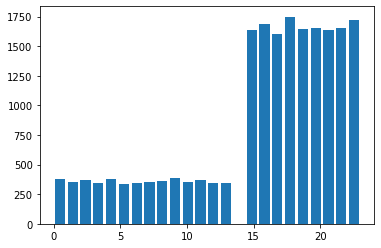

In [34]:
plt.hist(ab_df['peak ad hours'], bins=24, rwidth=0.8)


In [16]:
print(
    f'The minimum hour is {min(ab_df["peak ad hours"])}, and the maximum hour is {max(ab_df["peak ad hours"])}')


The minimum hour is 0, and the maximum hour is 23


In [37]:
ab_df['peak ad hours'].nunique()

23

This indicates that midnight is the 0th hour and it runs through 11 pm as the 23rd hour. There are no additional hours that are anomalous. What is odd is that there are only 23 hours collected. There is no data collected at hour 14 - so apparently no ads were run from 2 to 3 pm. 

The majority of ads were run from 3 pm through 11 pm. Far fewer ads were run from midnight to 2 pm. 

In [12]:
ab_df['ad_count'].value_counts()


5     3423
9     2612
8     2601
7     2469
6     2455
10    2439
3     1015
2     1005
4      991
1      990
Name: ad_count, dtype: int64

In [39]:
print(
    f'Each user saw at least {min(ab_df["ad_count"])} ad, and no more than {max(ab_df["ad_count"])} ads')


Each user saw at least 1 ad, and no more than 10 ads


(array([ 990., 1005., 1015.,  991., 3423., 2455., 2469., 2601., 2612.,
        2439.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

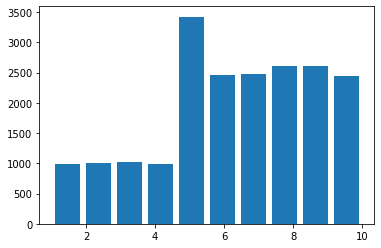

In [40]:
plt.hist(ab_df['ad_count'], bins=10, rwidth=0.8)


In [13]:
len(ab_df)

20000

## Tests and Targets
Target: Made Purchase binary
Test A: PSA
Test B: Ad
